# Preprocessing Workflow

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import datetime

Pour commencer je récupère les données construite avec mon scraper

In [268]:
data = pd.read_csv("./../datas/dataset_clean/lemans24.csv")

In [167]:
data.head()

,car,rank,brand,engine,tires_brand,category,race_year,try_rank,try_speed,race_rank,race_turn,race_mean,race_best_turn,race_max_speed,pilot_1,pilot_2,pilot_3
0,Chenard et Walcker Sport,1,NaN,Moteur Chenard et Walker L4 2978cc,Michelin,2001 a 3000,1923,pas de chrono,NaN,1er-1er 2001 a 3000,128 Tours - 2209.536 Km,Moyenne 92.064 km/h,09:59,NaN,André Lagache,René Léonard,NaN
1,Chenard et Walcker Sport,2,NaN,Moteur Chenard et Walker L4 2978cc,NaN,2001 a 3000,1923,pas de chrono,NaN,2ème-2e 2001 a 3000,124 Tours - 2140.488 Km,Moyenne 89.187 km/h,NaN,NaN,Raoul Bachmann,Christian Dauvergne,NaN
2,Bignan 11 HP Desmo,3,NaN,Moteur Bignan L4 1979cc,NaN,1501 a 2000,1923,pas de chrono,NaN,3ème-1er 1501 a 2000,120 Tours - 2071.44 Km,Moyenne 86.308 km/h,NaN,NaN,Raymond de Tornaco,Victor Gros,NaN
3,Excelsior Adex C,4,NaN,Moteur Excelsior L6 5343cc,NaN,5001 a 8000,1923,pas de chrono,NaN,4ème-1er 5001 a 8000,112 Tours - 1933.344 Km,Moyenne 80.556 km/h,NaN,NaN,André Dils,Nicolas Caerels,NaN
4,Bentley Sport,5,NaN,Moteur Bentley L4 2996cc,NaN,2001 a 3000,1923,pas de chrono,NaN,4ème-3e 2001 a 3000,112 Tours - 1933.344 Km,Moyenne 80.556 km/h,09:39,NaN,John Duff,Frank Clement,NaN


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657 entries, 0 to 4656
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   car             4657 non-null   object
 1   rank            4657 non-null   int64 
 2   brand           4409 non-null   object
 3   engine          4657 non-null   object
 4   tires_brand     3099 non-null   object
 5   category        4657 non-null   object
 6   race_year       4657 non-null   int64 
 7   try_rank        4657 non-null   object
 8   try_speed       3240 non-null   object
 9   race_rank       4657 non-null   object
 10  race_turn       4657 non-null   object
 11  race_mean       2180 non-null   object
 12  race_best_turn  3653 non-null   object
 13  race_max_speed  1949 non-null   object
 14  pilot_1         4656 non-null   object
 15  pilot_2         4652 non-null   object
 16  pilot_3         2473 non-null   object
dtypes: int64(2), object(15)
memory usage: 618.6+ KB


après quelques commandes, on peut voir qu'il va y avoir beaucoup de travail à faire sur les données car ce sont essentiellement des strings.

In [46]:
data.isnull().sum()/len(data)*100

car                0.000000
rank               0.000000
brand              5.325317
engine             0.000000
tires_brand       33.455014
category           0.000000
race_year          0.000000
try_rank           0.000000
try_speed         30.427314
race_rank          0.000000
race_turn          0.000000
race_mean         53.188748
race_best_turn    21.558944
race_max_speed    58.149023
pilot_1            0.021473
pilot_2            0.107365
pilot_3           46.897144
dtype: float64

après cette commande, on peut voir qu'un certain nombre de données sont manquante mais c'est normal car certaines informations n'était pas disponible dans les premières années ou alors disponible uniquement après un changement de réglementation (comme le troisième pilote par exemple)

Pour cette partie j'ai voulu retravailler les données de la colonne catégorie pour pouvoir filtrer par la suite

In [47]:
data['category'].value_counts()

LM P2             340
LM P1             243
3001 a 5000       213
C1                206
751 a 1100        200
                 ... 
56è STAND           1
Invité              1
Gr B                1
Gr II               1
Innovative Car      1
Name: category, Length: 71, dtype: int64

In [57]:
data.category.unique()

array(['2001 a 3000', '1501 a 2000', '5001 a 8000', '3001 a 5000',
       '1001 a 1500', '751 a 1100', '501 a 750', 'plus de 4001',
       '3001 à 4000', '2001 à 3000', '1501 à 2000', 'moins de 1000',
       '1001 à 1500', 'Sport', 'GT', 'S', 'Exp', 'P', 'Invité', 'SP',
       'GTS', 'TS', 'GTX', 'Gr VI', 'Gr V', 'GTP', 'Gr IV', 'IMSA',
       'Gr II', 'Nascar', 'Gr VI -2 Litres', 'Gr VI  -2 Litres',
       'IMSA GTX', 'IMSA GTO', 'Gr VI  2 Litres', 'C', 'IMSA GT', 'Gr B',
       'B', 'CJ', 'C1', 'C2', 'IMSA GTP', 'S2', 'S1', 'C3', 'C4', 'GT1',
       'LM P1', 'IMSA GTS', 'GT2', 'LM P2', 'WSC', 'LM GT1', 'LM GT2',
       'LM P875', 'LM P', 'LM GTP', 'LM GTS', 'LM GT', 'LMP 900',
       'LM P675', 'LM P1-LMP900', 'LM P1-LMP675', 'LM GTE Pro',
       'LM GTE Am', 'CDNT', 'LM P1-L', '56è STAND', 'Hypercar',
       'Innovative Car'], dtype=object)

Là je je filtre les catégories pour en regrouper certaines

In [67]:
contain_values = data[data['category'].str.contains(' a | à |plus de|moins de')]

In [68]:
contain_values.category.unique()

array(['2001 a 3000', '1501 a 2000', '5001 a 8000', '3001 a 5000',
       '1001 a 1500', '751 a 1100', '501 a 750', 'plus de 4001',
       '3001 à 4000', '2001 à 3000', '1501 à 2000', 'moins de 1000',
       '1001 à 1500'], dtype=object)

ici j'ai voulu afficher un graphique de l'évolution de race_mean, race_best_turn, race_max_speed par années 

In [145]:
data['race_best_turn']

0          09:59
1            NaN
2            NaN
3            NaN
4          09:39
          ...   
4652    3:49.696
4653    3:54.379
4654    3:54.374
4655    3:53.977
4656    3:51.318
Name: race_best_turn, Length: 4657, dtype: object

ces deux fonctions retravail mes données pour les rendre interprétable et formaté comme du temps

In [260]:
def strftime_format(value, format):
    try:
        datetime.datetime.strptime(value, format)
    except ValueError:
        return False
    return True

In [261]:
def string_to_time(value):
    try:
        if strftime_format(value, '%M:%S.%f'):
            return datetime.datetime.strptime(value, '%M:%S.%f').strftime('%M:%S.%f')
        elif strftime_format(value, '%M:%S'):
            return datetime.datetime.strptime(value, '%M:%S').strftime('%M:%S.%f')
        else:
            return datetime.datetime.strptime('00:00.000', '%M:%S.%f').strftime('%M:%S.%f')
    except ValueError:
        return datetime.datetime.strptime('00:00.000', '%M:%S.%f').strftime('%M:%S.%f')

In [262]:
data['race_best_turn'] = data['race_best_turn'].fillna('0')
data['race_best_turn'] = data['race_best_turn'].apply(string_to_time)

In [263]:
data['race_best_turn']

0       09:59.000000
1       00:00.000000
2       00:00.000000
3       00:00.000000
4       09:39.000000
            ...     
4652    03:49.696000
4653    03:54.379000
4654    03:54.374000
4655    03:53.977000
4656    03:51.318000
Name: race_best_turn, Length: 4657, dtype: object

Pour les deux graphiques suivant, on peut voir l'évolution de la vitesse sur le meilleur tour en fonction de l'année

In [314]:
date = data["race_year"]
value = data["race_best_turn"].values.astype(str)

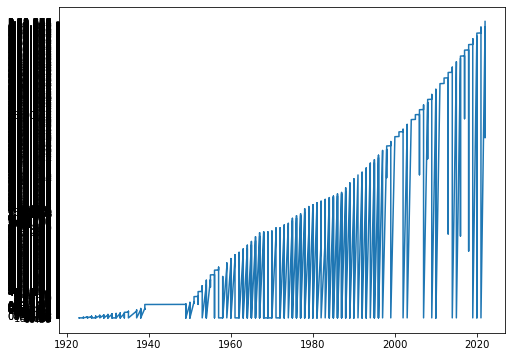

In [315]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(date, value);

<AxesSubplot:xlabel='race_year', ylabel='race_best_turn'>

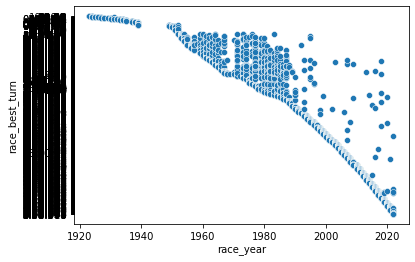

In [303]:
sns.scatterplot(x="race_year", y='race_best_turn', data=data)

même si le graphique n'est pas propre on peut voir que les temps ont énormément réduit au fur 
et à mesure des années